In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# %matplotblib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



# **Heart Disease**

**EN-US**
* age: The person's age in years
* sex: The person's sex (1=male, 0=female)
* cp: The chest pain experienced
    - 1: typical angina
    - 2: atypical angina
    - 3: non-anginal pain
    - 4: asymptomatic
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (>120 mg/dl, 1=true, 0=false)
* restecg: Resting electrocardiographic measurement 
    - 0: normal
    - 1: having ST-T wave abnormality
    - 2: showing probable or definite left ventricular hypertrophy by Estes'criteria
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1=yes, 0=no)
* oldpeak: ST depression induced by exercise relative to rest ('ST'relates to positions on the ECG plot)
* slope: the slope on the peak exercise ST segment 
    - 1: upsloping
    - 2: flat
    - 3: downsloping
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia
    - 3: normal
    - 6: fixed defect
    - 7: reversable defect
* target: Heart disease (0=No, 1=Yes)

**PT-BR**
* age: A idade da pessoa em anos
* sex: O sexo da pessoa (1=masculino, 0=feminino)
* cp: A dor no peito sentida
    - 1: angina tipica
    - 2: angina atipica
    - 3: dor não-angina
    - 4: assintomatica
* trestbps: A pressão artérial sanguinea (mm Hg na admissão no hospital)
* chol: A medida de colesterol da pessoa em mg/dl
* fbs: O nivel de açucar no sangue da pessoa (>120 mg/dl, 1=true, 0=false)
* restecg: Medição eletrocardiográfica em repouso
    - 0: normal
    - 1: tendo anormalidade na onda ST-T
    - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
* thalach: Frequencia cardíaca máxima atingida pela pessoa
* exang: Angina induzida por exercício (1=sim, 0=não)
* oldpeak: Depressão de ST induzida por exercício em relação ao repouso ('ST' refere-se a posições no gráfico de ECG)
* slope: a inclinação no pico do segmento ST do exercício
     - 1: ascendente
     - 2: plano
     - 3: descida
* ca: O número de vasos principais (0-3)
* thal: Uma doença sanguínea chamada talassemia
     - 3: normais
     - 6: defeito corrigido
     - 7: defeito reversível
* target: Doença cardíaca (0=Não, 1=Sim)


In [2]:
df = pd.read_csv('data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# verify duplicates lines
df.duplicated().sum()

723

In [6]:
df_hd = df.drop_duplicates()
df_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [7]:
df_hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df_hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

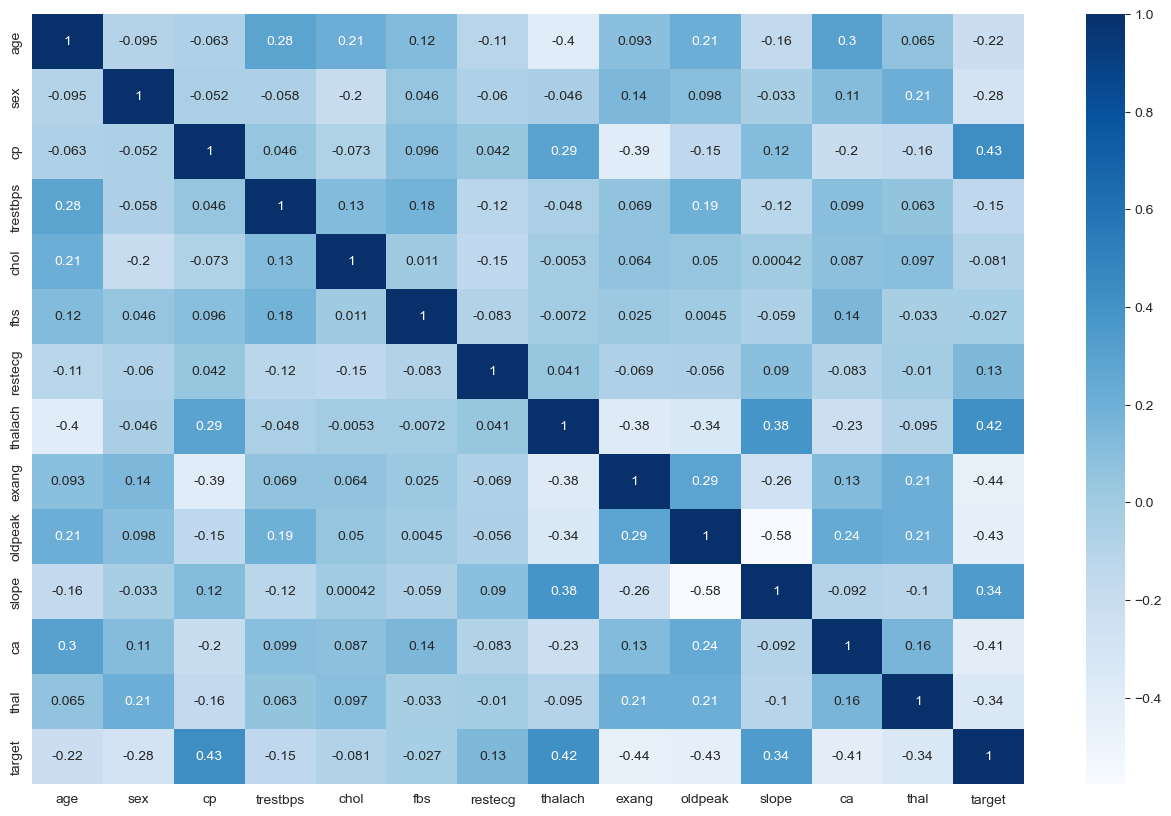

In [9]:
plt.figure(figsize = (16,10))
sns.heatmap(df_hd.corr(), annot= True, cmap = 'Blues')

In [10]:
df_hd.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [11]:
for c in df_hd.columns:
    print(f"{c}: {df_hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [12]:
categorics = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerics = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

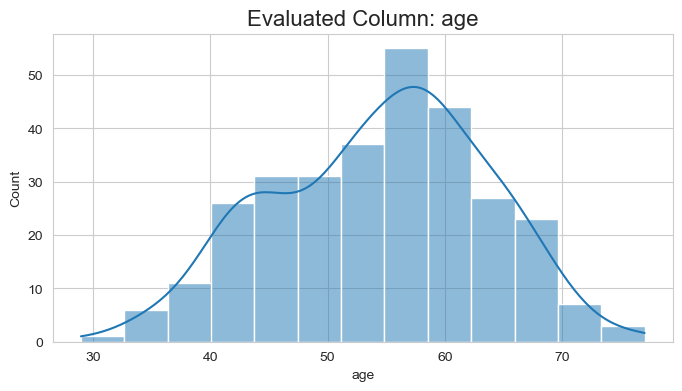

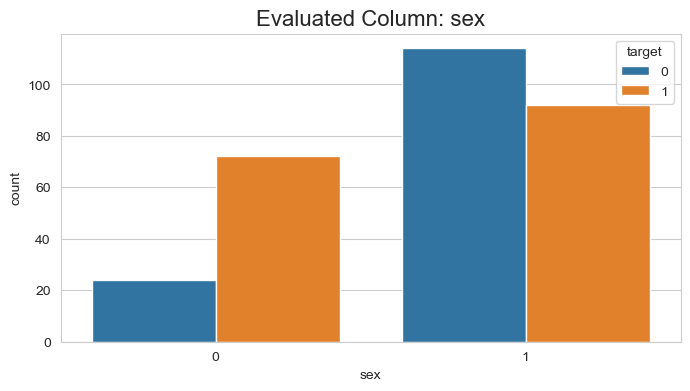

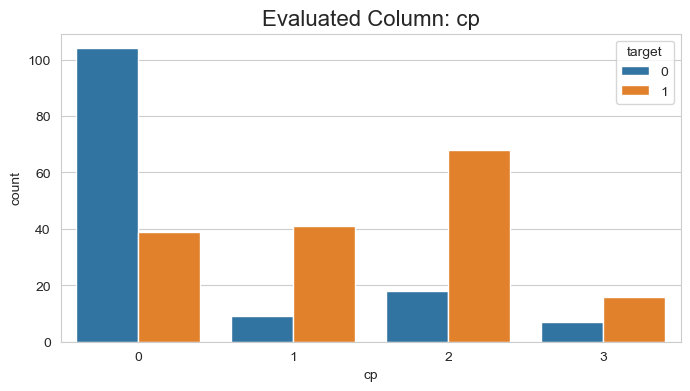

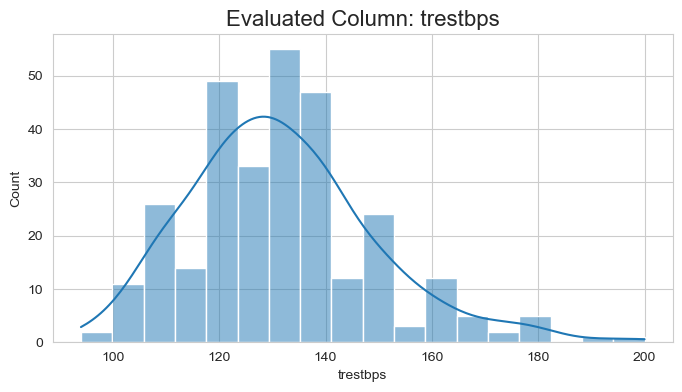

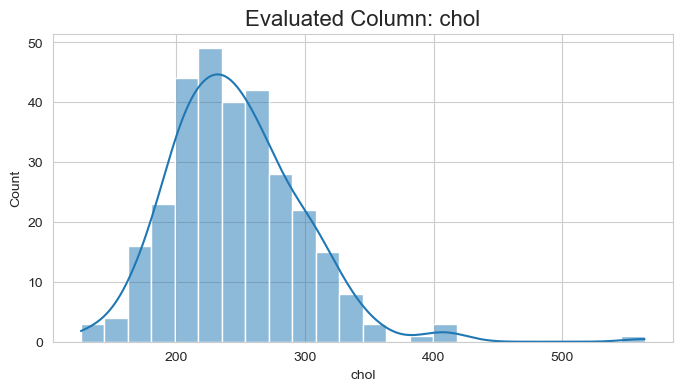

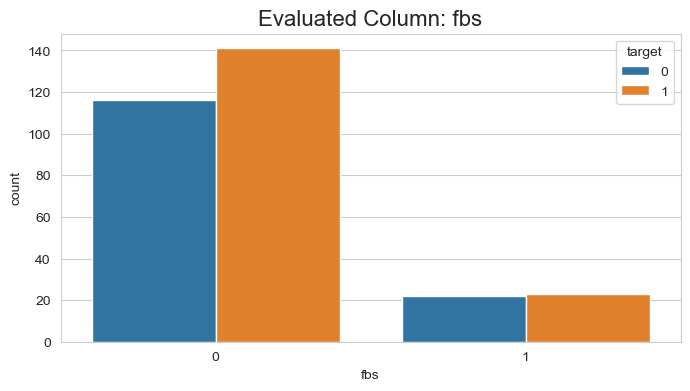

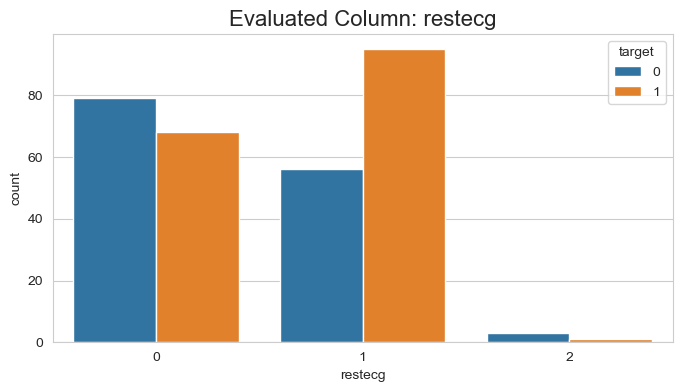

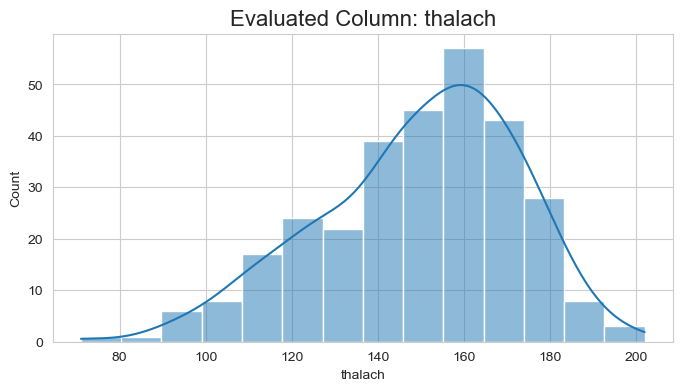

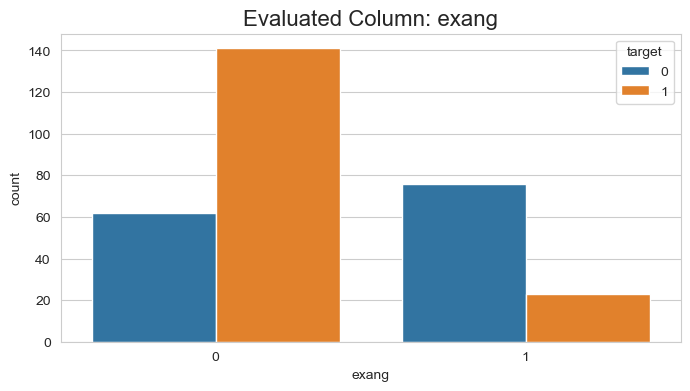

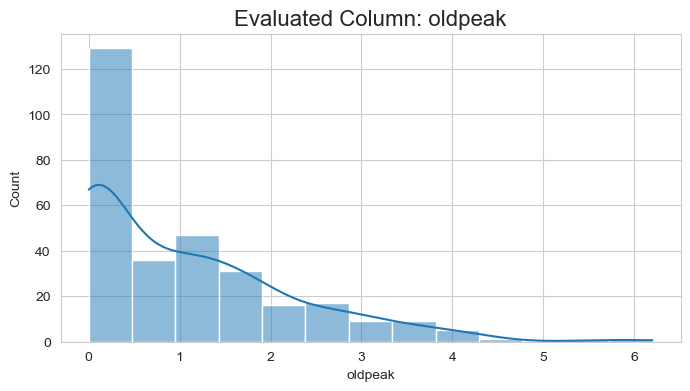

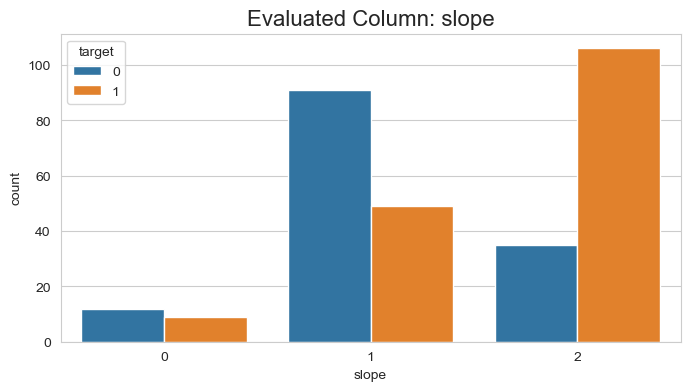

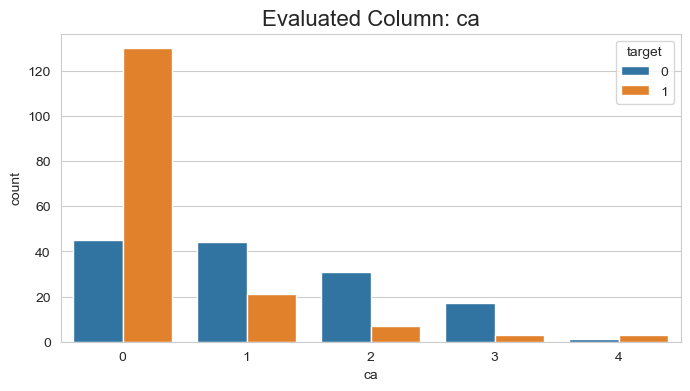

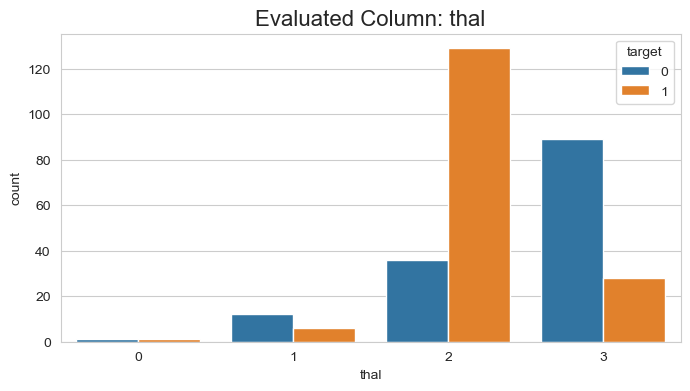

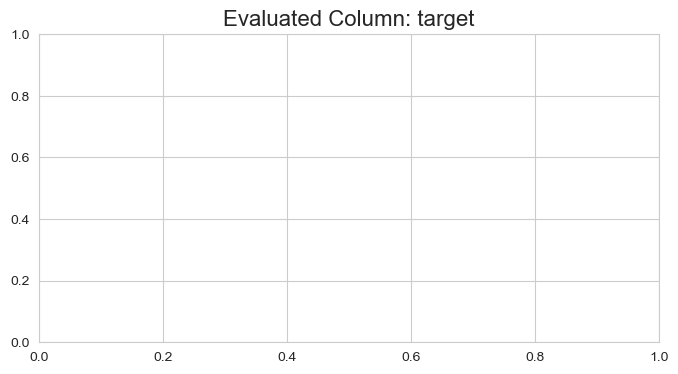

In [13]:
for c in df_hd.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Evaluated Column: {c}", fontsize=16)
    if c in categorics:
        sns.countplot(x= df_hd[c], hue= df_hd['target'])
    if c in numerics:
        sns.histplot(df_hd[c], kde = True)

# Remove Outliers

<Axes: >

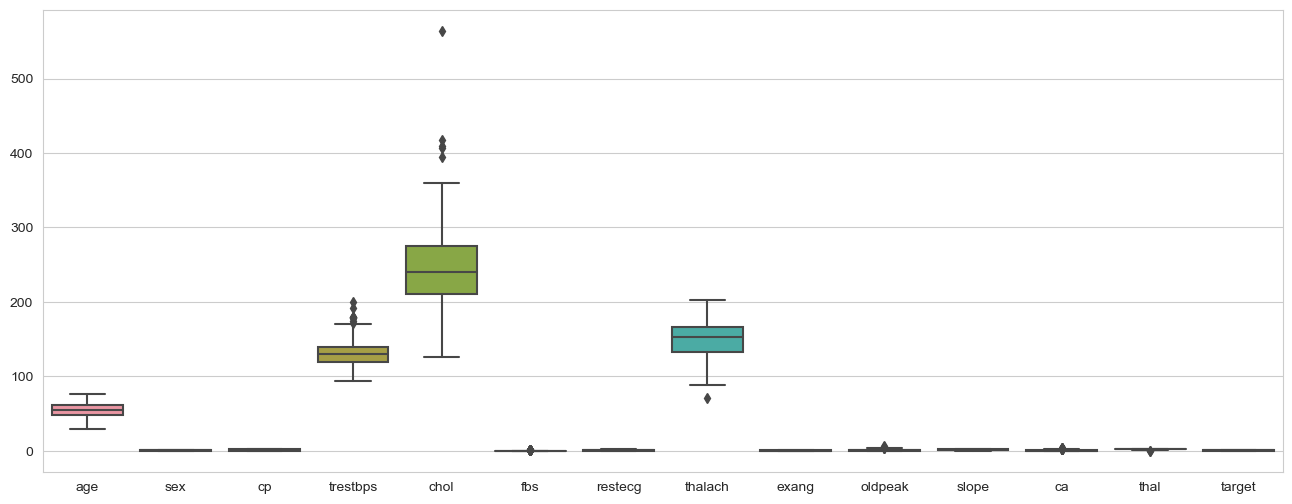

In [14]:
plt.figure(figsize= (16,6))
sns.boxplot(data= df_hd)

In [15]:
df_hd['trestbps'].quantile(0.99)

180.0

In [16]:
hd_v1 = df_hd[df_hd['trestbps'] < df_hd['trestbps'].quantile(0.99)]

<Axes: >

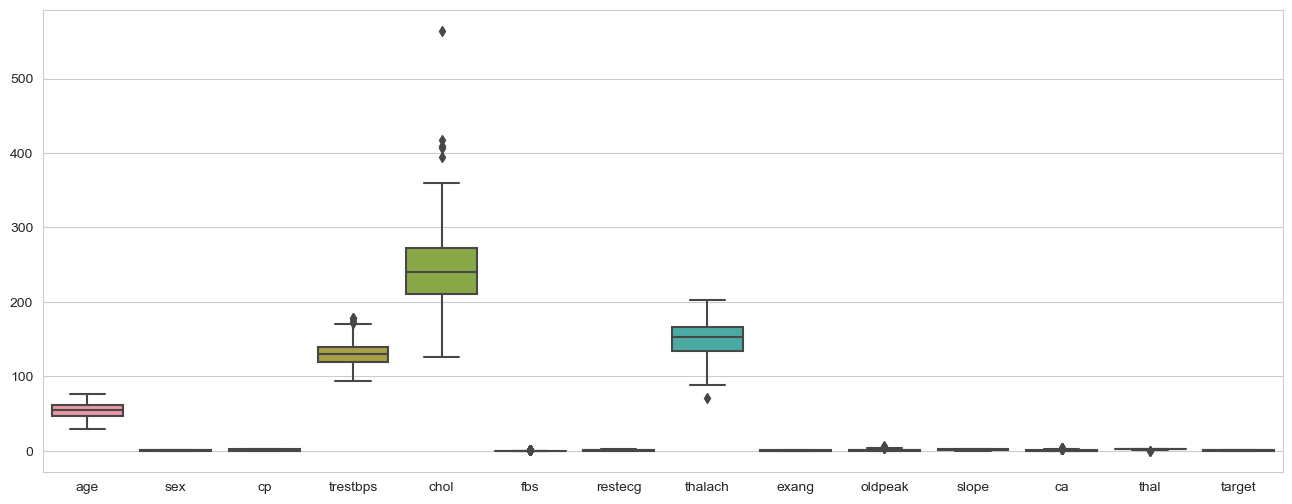

In [17]:
plt.figure(figsize= (16,6))
sns.boxplot(data= hd_v1)

In [18]:
hd_v1['chol'].quantile(0.98)

354.4799999999999

In [19]:
hd_v2 = hd_v1[hd_v1['chol'] < hd_v1['chol'].quantile(0.98)]

<Axes: >

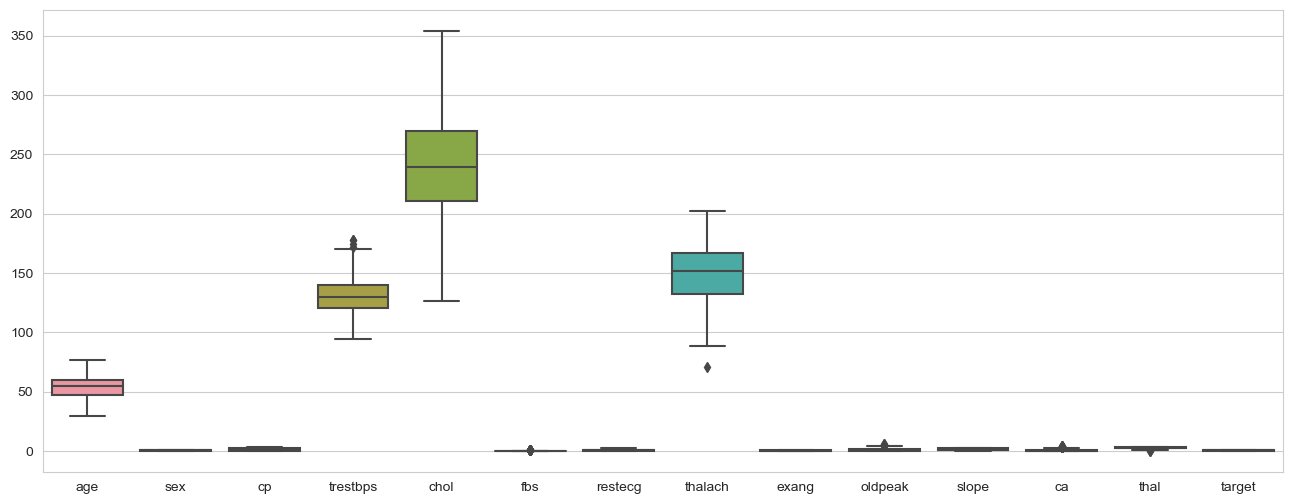

In [20]:
plt.figure(figsize= (16,6))
sns.boxplot(data= hd_v2)

In [21]:
hd_v2['thalach'].quantile(0.005)

88.9

In [22]:
hd_v3 = hd_v2[hd_v2['thalach'] > hd_v2['thalach'].quantile(0.005)]

<Axes: >

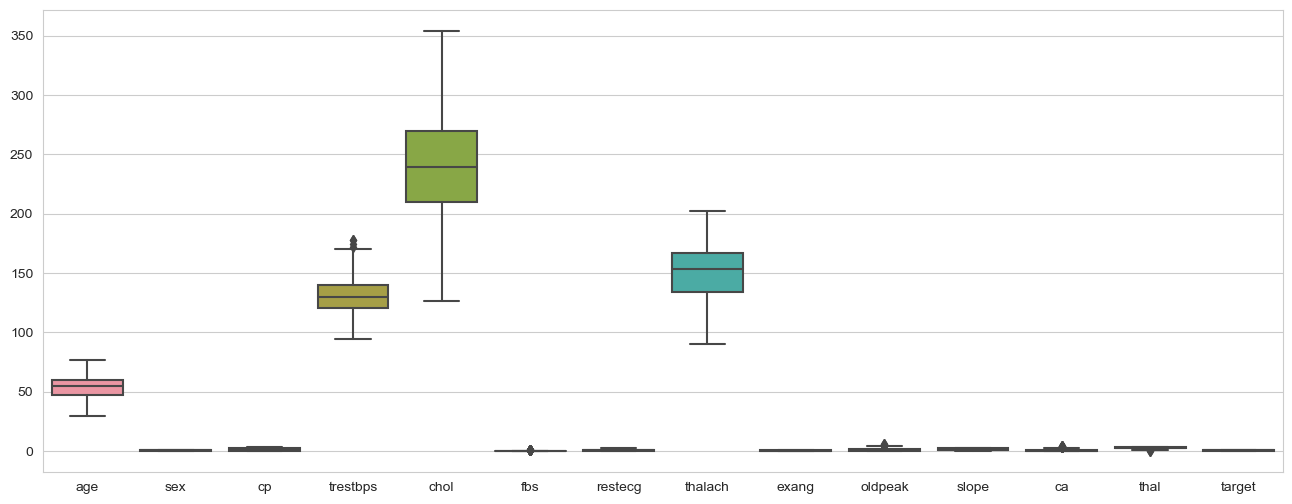

In [23]:
plt.figure(figsize= (16,6))
sns.boxplot(data= hd_v3)

In [24]:
categorics

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [25]:
numerics

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [26]:
hd_v4 = pd.get_dummies(hd_v3, columns = categorics)
hd_v4

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
843,59,160,273,125,0.0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [27]:
X = hd_v4.drop('target', axis = 1)
y = hd_v4['target']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
109,54,110,206,108,0.0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
74,48,130,256,150,0.0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
71,61,140,207,138,1.9,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
94,62,128,208,140,0.0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
26,44,130,233,179,0.4,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,64,140,313,133,0.2,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
80,50,140,233,163,0.6,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
129,57,140,192,148,0.4,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
599,63,140,195,179,0.0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [30]:
log = LogisticRegression(max_iter=1000)
log

LogisticRegression(max_iter=1000)

In [31]:
log.fit(X_train, y_train)

/Users/robsonbonfim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [32]:
log.score(X_train, y_train)

0.8744588744588745

In [33]:
log.score(X_test, y_test)

0.8448275862068966

In [34]:
y_prev = log.predict(X_test)
# send y_prev to Kaggle
y_prev

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [35]:
accuracy_score(y_test, y_prev)

0.8448275862068966

In [36]:
print(classification_report(y_test, y_prev))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [37]:
confusion_matrix(y_test, y_prev)

array([[18,  6],
       [ 3, 31]])

In [38]:
def report_ml(df, algoritm, opt=2):
    X = df.drop('target', axis = 1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)
    
    if opt==0:
        ml = algoritm(max_iter=1000)
    elif opt==1:
        ml = algoritm(n_estimators=1000)
    else:
        ml = algoritm()
        
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Acuracy train: {score_train * 100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"Acuracy test: {score_test * 100:.2f}%")
    
    y_prev = ml.predict(X_test)
    print("---- CONFUSION MATRIX ----")
    confusion = confusion_matrix(y_test, y_prev)
    sns.heatmap(confusion, annot = True, cmap = 'Blues')
    
    return score_train, score_test

Acuracy train: 87.01%
Acuracy test: 86.21%
---- CONFUSION MATRIX ----


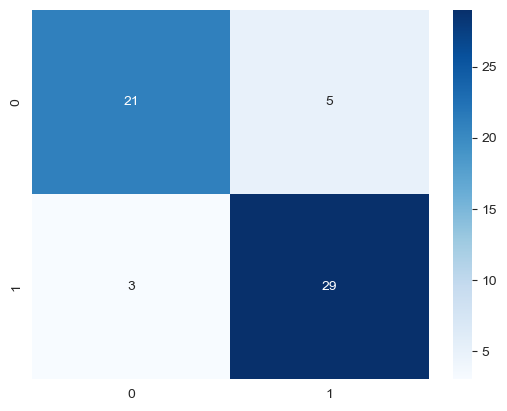

In [39]:
log_train, log_test = report_ml(hd_v4, LogisticRegression, 0)

Acuracy train: 100.00%
Acuracy test: 74.14%
---- CONFUSION MATRIX ----


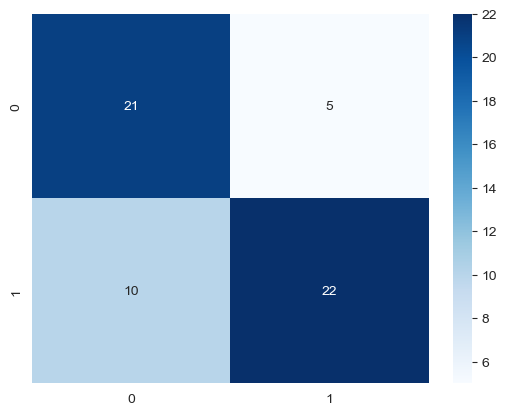

In [40]:
tree_train, tree_test = report_ml(hd_v4, DecisionTreeClassifier)

Acuracy train: 92.64%
Acuracy test: 79.31%
---- CONFUSION MATRIX ----


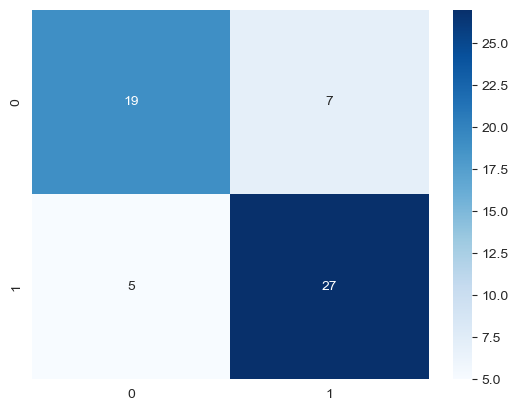

In [41]:
ada_train, ada_test = report_ml(hd_v4, AdaBoostClassifier)

Acuracy train: 74.46%
Acuracy test: 67.24%
---- CONFUSION MATRIX ----


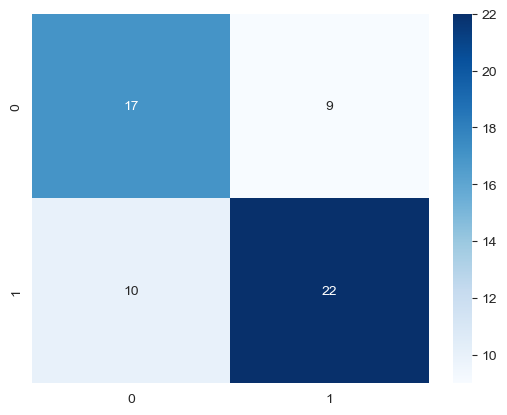

In [42]:
kn_train, kn_test = report_ml(hd_v4, KNeighborsClassifier)

Acuracy train: 100.00%
Acuracy test: 84.48%
---- CONFUSION MATRIX ----


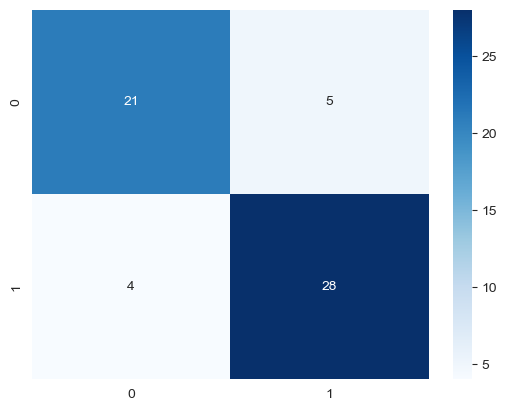

In [43]:
random_train, random_test = report_ml(hd_v4, RandomForestClassifier, opt=1)

In [44]:
data = {'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Boost'],
        'Accuracy Train': [round(log_train * 100, 2), round(tree_train * 100,2), round(kn_train * 100, 2), round(random_train * 100,2), round(ada_train * 100,2)],
        'Accuracy Test': [round(log_test * 100, 2), round(tree_test * 100,2), round(kn_test * 100, 2), round(random_test * 100,2), round(ada_test * 100,2)]     
}
df_show = pd.DataFrame(data)
df_show.sort_values(by='Accuracy Test', ascending=False, inplace=True)
df_show

,Models,Accuracy Train,Accuracy Test
0,Logistic Regression,87.01,86.21
3,Random Forest Classifier,100.00,84.48
4,Ada Boost,92.64,79.31
1,Decision Tree,100.00,74.14
2,KNeighbors,74.46,67.24


In [45]:
numerics

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [46]:
def report_ml_scaler(df, algoritm, opt=2):
    X = df.drop('target', axis = 1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)
    
    scaler = StandardScaler()
    cols_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
    X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])
    
    if opt==0:
        ml = algoritm(max_iter=1000)
    elif opt==1:
        ml = algoritm(n_estimators=1000)
    else:
        ml = algoritm()
        
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Acuracy train: {score_train * 100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"Acuracy test: {score_test * 100:.2f}%")
    
    y_prev = ml.predict(X_test)
    #print("---- CONFUSION MATRIX ----")
    #confusion = confusion_matrix(y_test, y_prev)
    #sns.heatmap(confusion, annot = True, cmap = 'Blues')
    
    return score_train, score_test

In [47]:
log_train_sc, log_test_sc = report_ml_scaler(hd_v4, LogisticRegression, 0)
tree_train_sc, tree_test_sc = report_ml_scaler(hd_v4, DecisionTreeClassifier)
ada_train_sc, ada_test_sc = report_ml_scaler(hd_v4, AdaBoostClassifier)
kn_train_sc, kn_test_sc = report_ml_scaler(hd_v4, KNeighborsClassifier)
random_train_sc, random_test_sc = report_ml_scaler(hd_v4, RandomForestClassifier, opt=1)


Acuracy train: 87.45%
Acuracy test: 87.93%
Acuracy train: 100.00%
Acuracy test: 79.31%
Acuracy train: 95.24%
Acuracy test: 77.59%
Acuracy train: 87.01%
Acuracy test: 86.21%
Acuracy train: 100.00%
Acuracy test: 86.21%


In [48]:
data = {'Models Scaler': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Boost'],
        'Accuracy Train': [round(log_train_sc * 100, 2), round(tree_train_sc * 100,2), round(kn_train_sc * 100, 2), round(random_train_sc * 100,2), round(ada_train_sc * 100,2)],
        'Accuracy Test': [round(log_test_sc * 100, 2), round(tree_test_sc * 100,2), round(kn_test_sc * 100, 2), round(random_test_sc * 100,2), round(ada_test_sc * 100,2)]     
}
df_show = pd.DataFrame(data)
df_show.sort_values(by='Accuracy Test', ascending=False, inplace=True)
df_show

,Models Scaler,Accuracy Train,Accuracy Test
0,Logistic Regression,87.45,87.93
2,KNeighbors,87.01,86.21
3,Random Forest Classifier,100.00,86.21
1,Decision Tree,100.00,79.31
4,Ada Boost,95.24,77.59


In [49]:
data = {'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Boost'],
        'Accuracy Train': [round(log_train * 100, 2), round(tree_train * 100,2), round(kn_train * 100, 2), round(random_train * 100,2), round(ada_train * 100,2)],
        'Accuracy Test': [round(log_test * 100, 2), round(tree_test * 100,2), round(kn_test * 100, 2), round(random_test * 100,2), round(ada_test * 100,2)]     
}
df_show = pd.DataFrame(data)
df_show.sort_values(by='Accuracy Test', ascending=False, inplace=True)
df_show

,Models,Accuracy Train,Accuracy Test
0,Logistic Regression,87.01,86.21
3,Random Forest Classifier,100.00,84.48
4,Ada Boost,92.64,79.31
1,Decision Tree,100.00,74.14
2,KNeighbors,74.46,67.24
